# Adult Mortality Rate Analysis

In this notebook, the global adult mortality rate (define as: _**the probability that a 15 year-old person dies before reaching his/her 60th birthday**_) is explored to have some insights about the topic. We go through three steps:
1. Collecting the data: since not all the intersted features are in the same dataset, a dataset is complied from two different datasets with the features of interest.
2. Cleaning the data: after compiling the dataset, some data points will be missing in the GDP per capita (USD) column. We will address these missing data in this step.
3. Exploratory data analysis (EDA): we visualize the features in different ways to get useful insights and trends from the data.

### Mortality rate definition:

Before we start, we need to define mortality rate in general. According to the [CDC website](https://www.cdc.gov/ophss/csels/dsepd/ss1978/lesson3/section3.html), the mortality rate over a specific period of time is defined mathematically as follwying:

$
{ MR = \frac{\text{deaths over the specific period of time}}{\text{total population in the middle of that period of time}}\times 10^n}
$

For the measure at hand, namely, the adult mortality rate, the definistion is adjusted to include only the group of people in that age category, i.e.,:

${AMR = \frac{\text{deaths of ages between 15 and 60 over the specific period of time}}{\text{total population of ages between 15 and 60 in the middle of that period of time}}\times 10^n}$

Here $n = 3$, i.e., per 1000 population. Furthermore, for sex-specific, the adult mortality rate for males and females are respectively defined as:

${AMR_M = \frac{\text{deaths of ages between 15 and 60 among males over the specific period of time}}{\text{total male population of ages between 15 and 60 in the middle of that period of time}}\times 10^n}$

${AMR_F = \frac{\text{deaths of ages between 15 and 60 among females over the specific period of time}}{\text{total female population of ages between 15 and 60 in the middle of that period of time}}\times 10^n}$

## Collecting the data

The [original dataset](http://www.who.int/gho/mortality_burden_disease/mortality_adult/situation_trends/en/) was taken from Global Health Observatory data repository, and has five columns:
1. Country.
2. Year (2000-2015)
3. Both sexes: the adult mortality rate from both sexes per 1000 population.
4. Male: the male adult mortality rate per 1000 population.
5. Female: the female adult mortality rate per 1000 population.

For convienince, I have added a new colum called (Continent) which indicates to which continent a country belongs, to make grouping by continent easy. The values of this new column takes one of the follwoing: Asia, Africa, North America, South America, Oceania, and Europe.

To get insights and trends, we need to add two more columns: one for the GDP per capita, and one for the countries names's code. These two features will be extracted from another [dataset](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD) that contains the countries, code, and the GDP per capita.  

After adding the Continent column manually, I first read the .csv file using pandas, and name it **AMR_full**. I first:
1. Ignored the first row in the original dataset, because the column names are in the second row.
2. Make the columns ['Continent', 'Country', 'Year'] the indecies of the dataframe, i.e., multi-level indexing because in the original dataset the same continent and country are reapeated many times. 

In [1]:
#importing pandas to read the .csv file
import pandas as pd

In [2]:
#create a dateframe called AMR from the .csv file
AMR_full = pd.read_csv('WHOSIS_000004_new.csv', skiprows = 1, 
                       #index_col = ['Continent', 'Country', 'Year']
                      )

In [3]:
#check the first 30 rows of the dataframe
AMR_full.head(32)

,Country,Year,Both sexes,Male,Female,Continent
0,Afghanistan,2015,263,284,239,Asia
1,Afghanistan,2014,271,294,245,Asia
2,Afghanistan,2013,268,289,245,Asia
3,Afghanistan,2012,272,293,249,Asia
4,Afghanistan,2011,275,297,252,Asia
5,Afghanistan,2010,279,300,256,Asia
6,Afghanistan,2009,281,302,259,Asia
7,Afghanistan,2008,287,309,264,Asia
8,Afghanistan,2007,295,318,271,Asia
9,Afghanistan,2006,295,316,273,Asia


Now we read the second dataset as

In [4]:
Code_GDP_df = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2.csv', skiprows = 4)

In [5]:
#check the head of the dataframe
Code_GDP_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24631.434860,24271.940421,25324.720362,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.777327,59.878153,58.492874,78.782758,82.208444,101.290471,...,445.893298,553.300289,603.537023,669.009051,631.744971,612.069651,569.577923,561.778746,NaN,NaN
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3347.844850,3529.053482,4299.012889,4598.249988,4804.616884,4709.312024,3695.793748,3308.700233,NaN,NaN
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4114.136545,4094.358832,4437.178068,4247.614308,4413.081697,4578.666728,3934.895394,4124.982390,NaN,NaN
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,43339.379875,39736.354063,41098.766942,38391.080867,40619.711298,42294.994727,36038.267604,36988.622030,NaN,NaN


From the above dataset we are interested in the (Country Code) column, and the columns 2000-2015. To extract these information, we first created two dictionary d1_country_code that contains (Country, Code) pairs, and d1_code_GDP that contains (Code, GDP per capita for the years 2015 - 2000).

In [6]:
import numpy as np

In [7]:
years = list(map(str, range(2015, 1999, -1)))
d1_country_code = {}
d1_code_GDP = {}
for index, row in Code_GDP_df.iterrows():
    d1_country_code[row['Country Name']] = row['Country Code']
    d1_code_GDP[row['Country Code']] = row[years]
    
Code1 = []
for index, row in AMR_full.iterrows():
    country = row['Country']
    if country in d1_country_code.keys():
        Code1.append(d1_country_code[country]) 
    else:
        Code1.append(np.nan)

Now, we add a column called Code to the dataframe AMR_full as following:

In [8]:
AMR_full['Code'] = Code1
#check the first five rows of the dataframe where Year = 2015
AMR_full[AMR_full['Year'] == 2015].head()

,Country,Year,Both sexes,Male,Female,Continent,Code
0,Afghanistan,2015,263,284,239,Asia,AFG
16,Albania,2015,74,98,51,Europe,ALB
32,Algeria,2015,109,134,83,Africa,DZA
48,Angola,2015,335,362,308,Africa,AGO
64,Antigua and Barbuda,2015,130,154,108,North America,ATG


We can check the NaN values in the contructed dataframe using the heatmap plot from seaborn.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

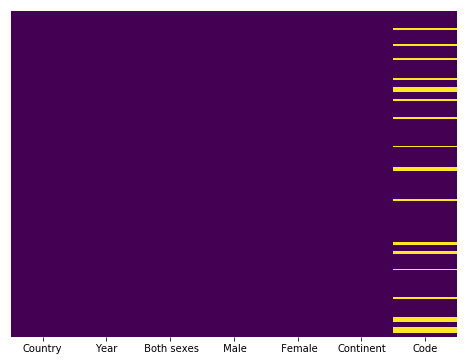

In [10]:
plt.figure(figsize = (8,6))
sns.heatmap(AMR_full.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

We can see that there are some missing data in the Code column. This is due the mismatch in country names in the two datasets. So, now the above dataframe is saved, and then the missing data will be filled manually from [this website](https://www.worldatlas.com/aatlas/ctycodes.htm).

In [11]:
AMR_full.to_csv('AMR_full_Code_missing.csv')

After filling the missing data, we overwrite the dataframe AMR_full with the new completed dataset as follows:

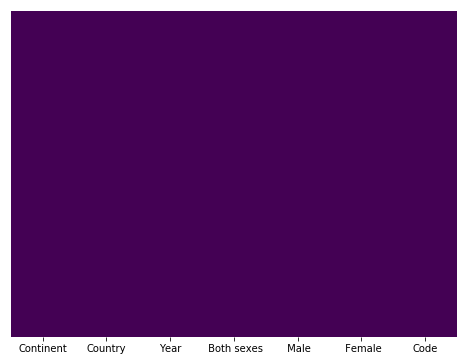

In [12]:
AMR_full = pd.read_csv('AMR_full_Code_Filled_Manually.csv', encoding = 'latin-1')
plt.figure(figsize = (8,6))
sns.heatmap(AMR_full.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

We see that there is no missing data in our dataframe. We proceed to fill the GDP per capita column. For this, we will use the Code column because it is the same in both datasets, not like the names)

In [13]:
GDP1 = []

for index, row in AMR_full.iterrows():
    code = row['Code']
    if (code != np.nan):
        if ((index % 16) == 15):
            if code in d1_code_GDP.keys():
                TheCode = d1_code_GDP[code]
                GDP1.extend(TheCode)
            else:
                GDP1.extend(np.ones(16)*np.nan)

We add a new column called (GDP per capita (USD)) as follows:

In [14]:
AMR_full['GDP per capita (USD)'] = GDP1
AMR_full[(AMR_full['Year'] == 2015) | (AMR_full['Year'] == 2000)].head(30)

,Continent,Country,Year,Both sexes,Male,Female,Code,GDP per capita (USD)
0,Asia,Afghanistan,2015,263,284,239,AFG,569.577923
15,Asia,Afghanistan,2000,321,345,296,AFG,NaN
16,Europe,Albania,2015,74,98,51,ALB,3934.895394
31,Europe,Albania,2000,110,146,70,ALB,1175.788981
32,Africa,Algeria,2015,109,134,83,DZA,4160.220067
47,Africa,Algeria,2000,145,163,126,DZA,1757.017797
48,Africa,Angola,2015,335,362,308,AGO,3695.793748
63,Africa,Angola,2000,408,437,379,AGO,555.296942
64,North America,Antigua and Barbuda,2015,130,154,108,ATG,13659.147914
79,North America,Antigua and Barbuda,2000,156,181,133,ATG,9932.029681


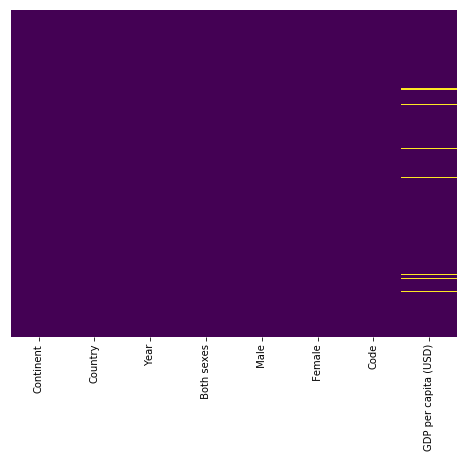

In [15]:
plt.figure(figsize = (8,6))
sns.heatmap(AMR_full.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

We see that there are some missing data in the new added column GDP per capita (USD). We can print countries that have missing data as follows:

In [16]:
def find_country(d1, code):
    for key, value in d1.items():
        #print(key)
        #print(value)
        if value == code:
            return key

missing_codes = set(AMR_full[AMR_full['GDP per capita (USD)'].isnull()]['Code'])
#missing_years = (AMR_full_copy_new[AMR_full_copy_new['GDP per capita (USD)'].isnull()]['Year'])
#missing_years
for code in missing_codes:
    print('*** Country: ', find_country(d1_country_code, code), '| Code:', code)
    print()
    print(AMR_full[AMR_full['Code'] == code][['Year', 'GDP per capita (USD)']])
    print('\n*** The number of missing data is: ',
          (AMR_full[AMR_full['Code'] == code]['GDP per capita (USD)'].isnull().value_counts()[True]))
    print('\n===========================================================================================================')

*** Country:  Sao Tome and Principe | Code: STP

      Year  GDP per capita (USD)
2208  2015           1615.320711
2209  2014           1824.160311
2210  2013           1619.532678
2211  2012           1380.949959
2212  2011           1304.326189
2213  2010           1129.754961
2214  2009           1099.571046
2215  2008           1126.462102
2216  2007            894.092799
2217  2006            843.800945
2218  2005            810.860157
2219  2004            693.304568
2220  2003            649.340215
2221  2002            555.818538
2222  2001            510.021638
2223  2000                   NaN

*** The number of missing data is:  1

*** Country:  Korea, Dem. People’s Rep. | Code: PRK

     Year  GDP per capita (USD)
704  2015                   NaN
705  2014                   NaN
706  2013                   NaN
707  2012                   NaN
708  2011                   NaN
709  2010                   NaN
710  2009                   NaN
711  2008                   NaN
712  2007

Next we will deal with addressing these missing data.

## Cleaning the data

From the last cell excution, we notice that the only country has no available data in the GDP per capita (USD) column is North Korea officially know as the Democtratic People's Repulic of Korea. We will have to find these information online. For all other countries we will replace the missing data with the average of the available data.

In [17]:
for code in missing_codes:
    if code != 'PRK':#To exlude North Korea since it has no numeric values
        avg = (AMR_full[AMR_full['Code'] == code]['GDP per capita (USD)']).mean()
        AMR_full.loc[AMR_full['Code'] == code, 'GDP per capita (USD)'] = AMR_full.loc[AMR_full['Code'] == code, 'GDP per capita (USD)'].fillna(avg) 

In [18]:
for code in missing_codes:
    print('*** Country: ', find_country(d1_country_code, code), '| Code:', code)
    print()
    print(AMR_full[AMR_full['Code'] == code][['Year', 'GDP per capita (USD)']])
    #print('\n*** The number of missing data is: ',
      #    (AMR_full[AMR_full['Code'] == code]['GDP per capita (USD)'].isnull().value_counts()[True]))
    print('\n===========================================================================================================')

*** Country:  Sao Tome and Principe | Code: STP

      Year  GDP per capita (USD)
2208  2015           1615.320711
2209  2014           1824.160311
2210  2013           1619.532678
2211  2012           1380.949959
2212  2011           1304.326189
2213  2010           1129.754961
2214  2009           1099.571046
2215  2008           1126.462102
2216  2007            894.092799
2217  2006            843.800945
2218  2005            810.860157
2219  2004            693.304568
2220  2003            649.340215
2221  2002            555.818538
2222  2001            510.021638
2223  2000           1070.487788

*** Country:  Korea, Dem. People’s Rep. | Code: PRK

     Year  GDP per capita (USD)
704  2015                   NaN
705  2014                   NaN
706  2013                   NaN
707  2012                   NaN
708  2011                   NaN
709  2010                   NaN
710  2009                   NaN
711  2008                   NaN
712  2007                   NaN
713  2006       

Now, that all countries except North Korea have full GDP per capita information. From [this website](https://www.indexmundi.com/g/g.aspx?c=kn&v=67), GDP per capita in North Korea for the avialble years are


|  |  |
| --- | --- |
| **Year** | 2000 |	2002 |	2003 |	2004 |	2005 |	2006 |	2007 |	2008 |	2009 |	2011 |	2015 |
| **GDP per capita (USD)** | 1,000 |	1,000 |	1,300 |	1,700 |	1,700 |	1,800 |	1,700 |	1,800 |	1,800 |	1,800 |	1,700 |

So, we see that some years are still missing. We will these missing data using the average of the avialable years. We define a list contains the GDP per capita (USD) for 2015 down to 2000 as follows:

In [19]:
GDP_PRK = [1700, np.nan, np.nan, np.nan, 1800, np.nan, 1800, 1800, 1700, 1800, 1700, 1700, 1300, 1000, np.nan, 1000]

In [20]:
AMR_full.loc[AMR_full['Code'] == 'PRK', 'GDP per capita (USD)'] = GDP_PRK
GDP_PRK_avg = AMR_full.loc[AMR_full['Code'] == 'PRK', 'GDP per capita (USD)'].mean()
AMR_full.loc[AMR_full['Code'] == 'PRK', 'GDP per capita (USD)'] = AMR_full.loc[AMR_full['Code'] == 'PRK', 'GDP per capita (USD)'].fillna(GDP_PRK_avg)

for code in missing_codes:
    print('*** Country: ', find_country(d1_country_code, code), '| Code:', code)
    print()
    print(AMR_full[AMR_full['Code'] == code][['Year', 'GDP per capita (USD)']])
    #print('\n*** The number of missing data is: ',
      #    (AMR_full[AMR_full['Code'] == code]['GDP per capita (USD)'].isnull().value_counts()[True]))
    print('\n===========================================================================================================')

*** Country:  Sao Tome and Principe | Code: STP

      Year  GDP per capita (USD)
2208  2015           1615.320711
2209  2014           1824.160311
2210  2013           1619.532678
2211  2012           1380.949959
2212  2011           1304.326189
2213  2010           1129.754961
2214  2009           1099.571046
2215  2008           1126.462102
2216  2007            894.092799
2217  2006            843.800945
2218  2005            810.860157
2219  2004            693.304568
2220  2003            649.340215
2221  2002            555.818538
2222  2001            510.021638
2223  2000           1070.487788

*** Country:  Korea, Dem. People’s Rep. | Code: PRK

     Year  GDP per capita (USD)
704  2015           1700.000000
705  2014           1572.727273
706  2013           1572.727273
707  2012           1572.727273
708  2011           1800.000000
709  2010           1572.727273
710  2009           1800.000000
711  2008           1800.000000
712  2007           1700.000000
713  2006       

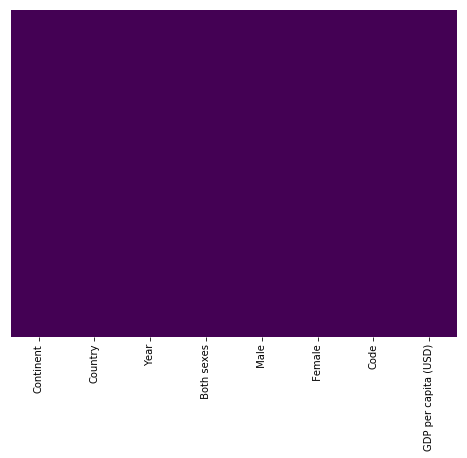

In [21]:
plt.figure(figsize = (8,6))
sns.heatmap(AMR_full.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

We see that now our dataset is clean, i.e., there is no missing data. Next we will proceed to do some exploratory data analysis (EDA) on the data.

## Exploratory data analysis (EDA)

In [22]:
AMR_full.head()

,Continent,Country,Year,Both sexes,Male,Female,Code,GDP per capita (USD)
0,Asia,Afghanistan,2015,263,284,239,AFG,569.577923
1,Asia,Afghanistan,2014,271,294,245,AFG,612.069651
2,Asia,Afghanistan,2013,268,289,245,AFG,631.744971
3,Asia,Afghanistan,2012,272,293,249,AFG,669.009051
4,Asia,Afghanistan,2011,275,297,252,AFG,603.537023


First, we compare the average adult mortality rate for each continent between 2000 and 2015, for each of the types (both sexes, male, and female).

In [23]:
AMR_full_groupby_continent = AMR_full.groupby('Continent').mean()
AMR_full_groupby_continent

,Year,Both sexes,Male,Female,GDP per capita (USD)
Continent,,,,,
Africa,2007.5,322.113426,346.806713,297.987269,2013.935417
Asia,2007.5,157.840426,193.273936,120.613032,9402.654840
Europe,2007.5,112.133013,153.296474,70.197115,25699.180331
North America,2007.5,154.462500,191.875000,117.268750,10332.154813
Oceania,2007.5,168.725000,197.087500,139.600000,9275.686196
South America,2007.5,159.461538,200.014423,117.750000,6465.857835


In [24]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
AMR_full_groupby_continent.columns

Index(['Year', ' Both sexes', ' Male', ' Female', 'GDP per capita (USD)'], dtype='object')

### Note: We note that the some column names are preceded by a blank space before each name. We need to consider this when calling columns.

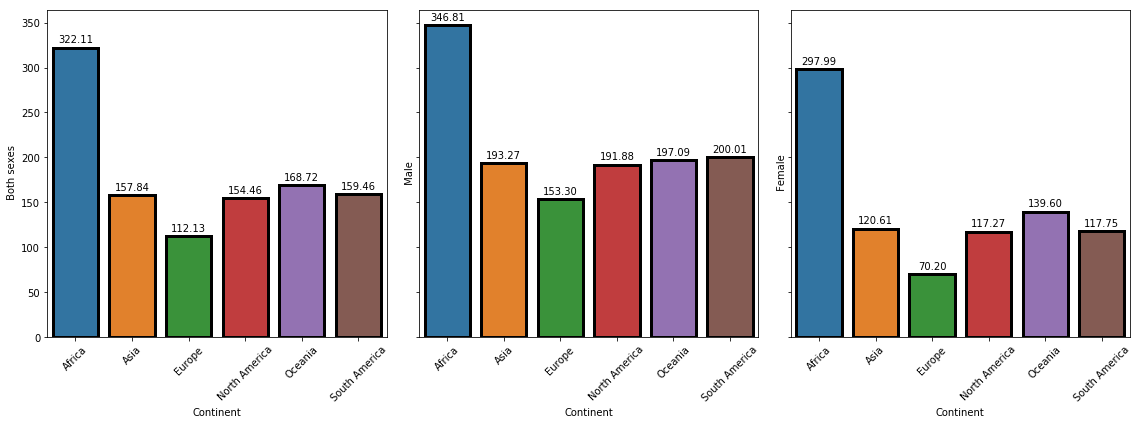

In [26]:
fig, ax = plt.subplots(1, 3, sharey = True, figsize = (16, 6))

#rotate the lables in the x-axis by 45 degrees
for i in range(3):
    ax[i].xaxis.set_tick_params(rotation=45)


g0 = sns.barplot(x = 'Continent', y = ' Both sexes', data = AMR_full_groupby_continent.reset_index(), 
            edgecolor = ['k', 'k', 'k', 'k', 'k', 'k'], linewidth = 3, ax = ax[0])
for p in g0.patches:
        g0.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', xytext=(0, 8), textcoords='offset points') 
        
g1 = sns.barplot(x = 'Continent', y = ' Male', data = AMR_full_groupby_continent.reset_index(), 
            edgecolor = ['k', 'k', 'k', 'k', 'k', 'k'], linewidth = 3, ax = ax[1])
for p in g1.patches:
        g1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', xytext=(0, 8), textcoords='offset points') 

g2 = sns.barplot(x = 'Continent', y = ' Female', data = AMR_full_groupby_continent.reset_index(), 
            edgecolor = ['k', 'k', 'k', 'k', 'k', 'k'], linewidth = 3, ax = ax[2])
for p in g2.patches:
        g2.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', xytext=(0, 8), textcoords='offset points') 

plt.tight_layout()

We can see immediately that Africa has the highest average adult mortality rate between the years 2000 and 2015. On the other hand, Europe has the lowset average adult mortality rate. Also, we see that male average mortality rate is higher than female average adult mortality rate in all continents. 

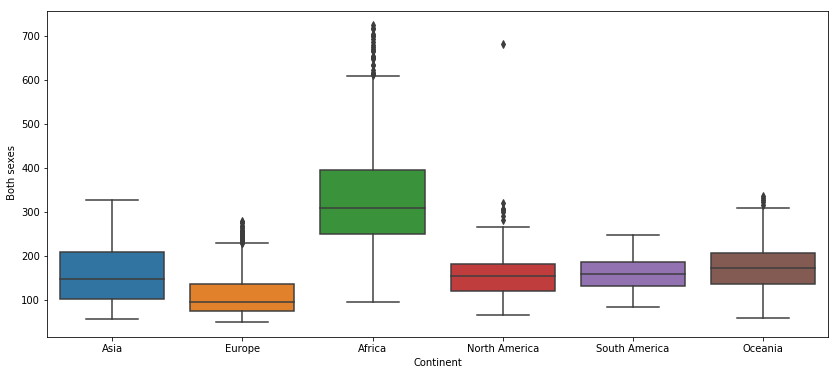

In [27]:
plt.figure(figsize = (14, 6))
sns.boxplot(x = 'Continent', y = ' Both sexes', data = AMR_full)

In [28]:
AMR_full_groupby_continent

,Year,Both sexes,Male,Female,GDP per capita (USD)
Continent,,,,,
Africa,2007.5,322.113426,346.806713,297.987269,2013.935417
Asia,2007.5,157.840426,193.273936,120.613032,9402.654840
Europe,2007.5,112.133013,153.296474,70.197115,25699.180331
North America,2007.5,154.462500,191.875000,117.268750,10332.154813
Oceania,2007.5,168.725000,197.087500,139.600000,9275.686196
South America,2007.5,159.461538,200.014423,117.750000,6465.857835


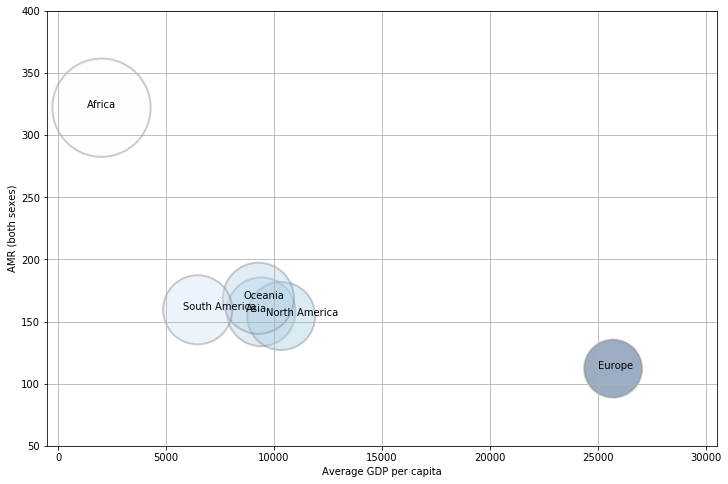

In [29]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(x = 'GDP per capita (USD)', y = ' Both sexes', c = AMR_full_groupby_continent['GDP per capita (USD)'], 
           data = AMR_full_groupby_continent, s = AMR_full_groupby_continent[' Both sexes']*30, 
            cmap = 'Blues', edgecolors="grey", linewidth=2, alpha = 0.4)
for index, row in AMR_full_groupby_continent.iterrows():
    #ax.text(row[3], row[0], index)
    ax.annotate(index, xy = (row[4], row[1]), xytext = (-15, 0), textcoords='offset points')
#ax.text(2500, 250, 'Hello')       
plt.xlabel('Average GDP per capita')
plt.ylabel('AMR (both sexes)')
plt.ylim(50, 400)
plt.xlim(-500, 30500)
plt.grid()

We note Africa has the lowest average GDP per capita in 2015, and the highest average adult mortality rate. On the other hand, Europe, has the hihest average GDP per capita in 2015, and the lowest average adult mortality rate. It seems that, generally speaking, there is a negative relationship between GDP per capita and average adult mortality rate.

Text(0,0.5,'Number of Countries/Continent')

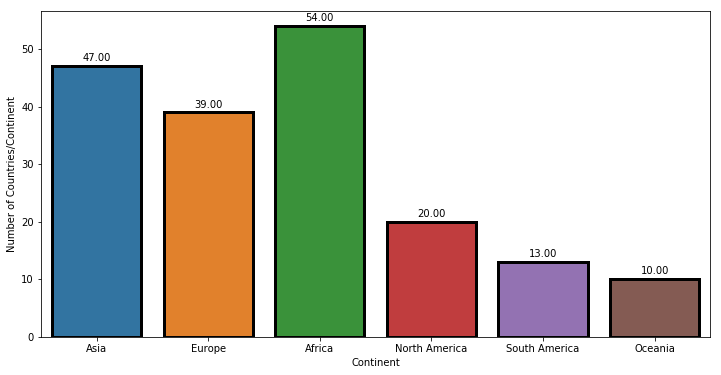

In [30]:
plt.figure(figsize = (12, 6))
g = sns.countplot(x = 'Continent', data = AMR_full[AMR_full['Year'] == 2015], edgecolor = ['k', 'k', 'k', 'k', 'k', 'k'], linewidth = 3)
for p in g.patches:
    g.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0, 8), textcoords='offset points')
plt.ylabel('Number of Countries/Continent')

In [31]:
continents = list(AMR_full['Continent'].unique())
continents

['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']

In [32]:
AMR_GDP_2015 = AMR_full[AMR_full['Year'] == 2015]
AMR_GDP_2015.head()

,Continent,Country,Year,Both sexes,Male,Female,Code,GDP per capita (USD)
0,Asia,Afghanistan,2015,263,284,239,AFG,569.577923
16,Europe,Albania,2015,74,98,51,ALB,3934.895394
32,Africa,Algeria,2015,109,134,83,DZA,4160.220067
48,Africa,Angola,2015,335,362,308,AGO,3695.793748
64,North America,Antigua and Barbuda,2015,130,154,108,ATG,13659.147914


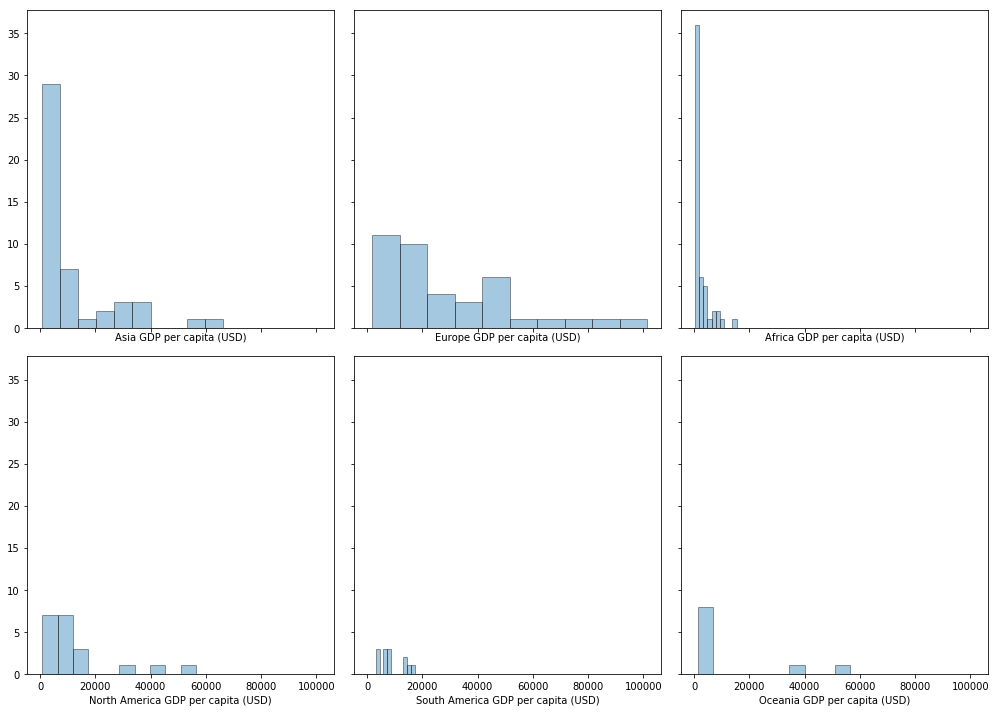

In [33]:
fig, ax = plt.subplots(2, 3, sharey = True, sharex = True, figsize = (14, 10))
count = 0
for i in range(2):
    for j in range(3):
        sns.distplot(AMR_GDP_2015[AMR_GDP_2015['Continent'] == continents[count]]['GDP per capita (USD)'], 
                     ax = ax[i,j], kde = False, hist_kws = dict(edgecolor = 'k'), bins = 10)
        ax[i, j].set_xlabel(continents[count]+' GDP per capita (USD)')
        count += 1
plt.tight_layout()        

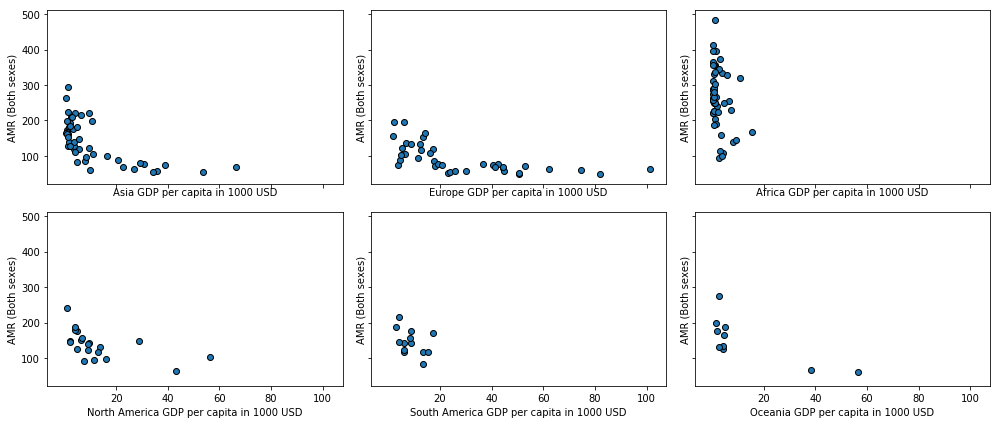

In [34]:
fig, ax = plt.subplots(2, 3, figsize = (14, 6), sharey = True, sharex = True)
plt.setp(ax, xticks=[20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000], xticklabels=[20, 40, 60, 80, 100, 120, 140, 160])
count = 0
for i in range(2):
    for j in range(3):
        ax[i, j].scatter(x = 'GDP per capita (USD)', y = ' Both sexes', 
                         data = AMR_GDP_2015[AMR_GDP_2015['Continent'] == continents[count]], edgecolor = 'k')
        ax[i, j].set_xlabel(continents[count]+' GDP per capita in 1000 USD')
        ax[i, j].set_ylabel('AMR (Both sexes)')
        count += 1
plt.tight_layout()

We saw that South America behaved oddly when we compared the average adult mortality rate and the average GDP per capita, namely, it had an average GDP per capita greater than each of Asia, Oceania, and North America, yet it had almost the same average adult mortality rate. From the scatter plots above we see that Sounth America 13 countries in the dataset, all of which but one is above 20,000 USD, actually is way above 20,000 USD yet it has a similar AMR to other South America countries (what is this country?). The variance in the distribution explains the high average GDP per capita, while the clustering of all other countries below 20,000 USD explains the relatively high average adult mortality rate. 

Something interesting we note from the scatter plots of all continents is that the AMR declines and stays low after the GDP per capita threshold of 20,000 USD. All African countries have a GDP per capita less that 20,000 USD, but they have very different AMR. This suggests that below the threshold 20,000 USD, another factor plays a role in the rate of AMR. 

(0, 20000)

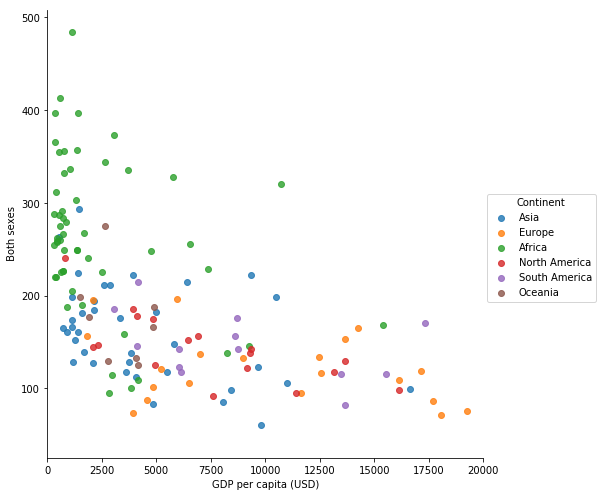

In [35]:
plt.figure(figsize = (12, 6))
sns.lmplot(x = 'GDP per capita (USD)', y = ' Both sexes', data = AMR_GDP_2015, hue = 'Continent', fit_reg = False, size = 7)
plt.xlim([0, 20000])

In [36]:
import cufflinks as cf

In [37]:
cf.go_offline()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [38]:
from plotly.offline import plot, iplot, init_notebook_mode, download_plotlyjs
import plotly.graph_objs as go

In [39]:
init_notebook_mode(connected = True)

In [40]:
data = []
for cont in continents:
    trace = go.Scatter(
        x = AMR_GDP_2015[AMR_GDP_2015['Continent'] == cont]['GDP per capita (USD)'],
        y = AMR_GDP_2015[AMR_GDP_2015['Continent'] == cont][' Both sexes'],
        mode = 'markers',
        name = cont)
    data.append(trace)

In [41]:
iplot(data)

In [42]:
AMR_GDP_2015.head()

,Continent,Country,Year,Both sexes,Male,Female,Code,GDP per capita (USD)
0,Asia,Afghanistan,2015,263,284,239,AFG,569.577923
16,Europe,Albania,2015,74,98,51,ALB,3934.895394
32,Africa,Algeria,2015,109,134,83,DZA,4160.220067
48,Africa,Angola,2015,335,362,308,AGO,3695.793748
64,North America,Antigua and Barbuda,2015,130,154,108,ATG,13659.147914


Now we will see if the average adult mortality rate declines with the passing of time for each country. To do this, we need first group the countries of the same continent by each year, and then find the average adult mortality rate. This easy using groupby method, and thus we need first to reset the index such that the continent and year indices are columns. 

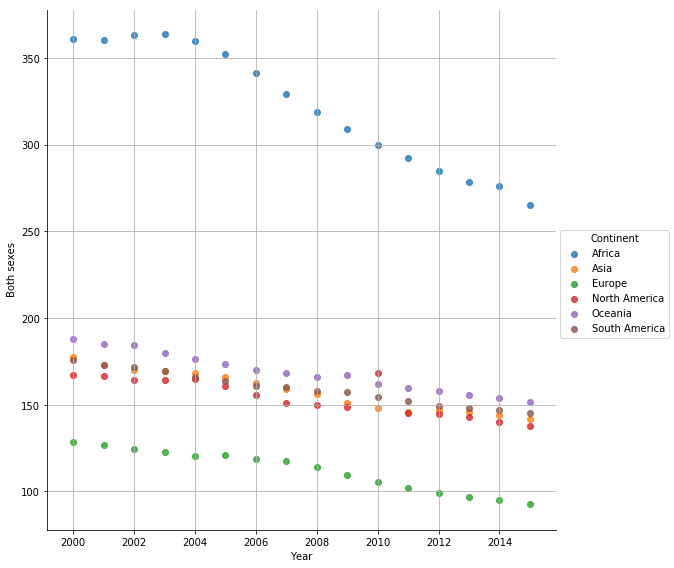

In [43]:
# sns.lmplot(x = 'Year', y = ' Both sexes', data = grouped_cont_year.reset_index(level = ['Year', 'Continent']), 
#            fit_reg = False, hue = 'Continent', size = 8)
# plt.grid()

sns.lmplot(x = 'Year', y = ' Both sexes', data = AMR_full.groupby(['Continent', 'Year']).mean().reset_index(level = ['Continent', 'Year']), 
            fit_reg = False, hue = 'Continent', size = 8)
plt.grid()

In [44]:
grouped_cont_year_rstIndx = AMR_full.groupby(['Continent', 'Year']).mean().reset_index(level = ['Continent', 'Year'])

In [45]:
data = []
for cont in continents:
    trace = go.Scatter(
        x = grouped_cont_year_rstIndx[grouped_cont_year_rstIndx['Continent'] == cont]['Year'],
        y = grouped_cont_year_rstIndx[grouped_cont_year_rstIndx['Continent'] == cont][' Both sexes'],
        mode = 'markers',
        name = cont)
    data.append(trace)
iplot(data)

We can see from the scatter plots above that, although African countries still have the highest average mortality rate, it (the average mortality rate) declined significantly over the 15 years from 2000 to 2015. In numbers, it dropped from more that 360 per 1000 population, to 265 per 1000 population. This is a drop of 100 person on average per 1000 population, compared to other continents where the drop is not that significant. 

Something intersting to note in the figure is North America, where we see that the average adult mortality rate increased at 2010. This is the year when Haiti was struch by an Earthquake of magnitude 7 $M_w$, and caused the death of more than 160,000 people. Otherwise, the trend in all continents is the same; declining. 

Next, I will draw a choropleth map using plotly that shows the countries and the average AMR on the map. 

In [46]:
import numpy as np

In [47]:
data = dict(type = 'choropleth',
            locations = AMR_GDP_2015['Code'],
            z = AMR_GDP_2015[' Both sexes'],
            text = AMR_GDP_2015['Country'],
            colorscale = 'Viridis',
            reversescale = True,
            colorbar = {'title': 'AMR per 1000'})

In [48]:
layout = dict(title = 'Chrorpleth Map: Adult Mortality Rate',
             geo = dict(showframe = False, projection = {'type': 'Mercator'}))

In [49]:
choromap3 = go.Figure(data = [data], layout = layout)

In [50]:
iplot(choromap3)

From the above choropleth map it clear that the african countries have the highest adumt mortality rate, while Europe, Australia, and Canada have the lowest adult mortality rate in 2015. 